In [1]:
#from main import relations_eid, relations_customer, relations_eid2, relations_eid3, relations_eid4
from main import display_basic_info, relations_eid, relations_customer, relations_object_type, plot_number_of_orders, plot_number_of_orders, obj_interaction, rel_obj_for_event, when_objects_terminated

e:\Programy\Conda\lib\site-packages\pm4py\util\dt_parsing\parser.py:76: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


interactive(children=(Text(value='logs/running-example.jsonocel', description='log_path'), Output()), _dom_cla…

interactive(children=(Text(value='1.0', description='eid'), Dropdown(description='type', options=('products', …

interactive(children=(Dropdown(description='customer', options=('Marco Pegoraro', 'Gyunam Park', 'Majid Rafiei…

interactive(children=(Dropdown(description='Object type:', options=('products', 'customers', 'items', 'orders'…

interactive(children=(Dropdown(description='date', options=(datetime.date(2019, 5, 20), datetime.date(2019, 5,…

interactive(children=(Output(),), _dom_classes=('widget-interact',))

interactive(children=(Text(value='880001', description='oid'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Text(value='1.0', description='eid'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Dropdown(description='obj_type', options=('products', 'customers', 'items', 'orders', 'p…

In [2]:
import pm4py
import os
log_path = "logs/running-example.jsonocel"
ocel = pm4py.read_ocel_json(log_path)
model = pm4py.discover_oc_petri_net(ocel)

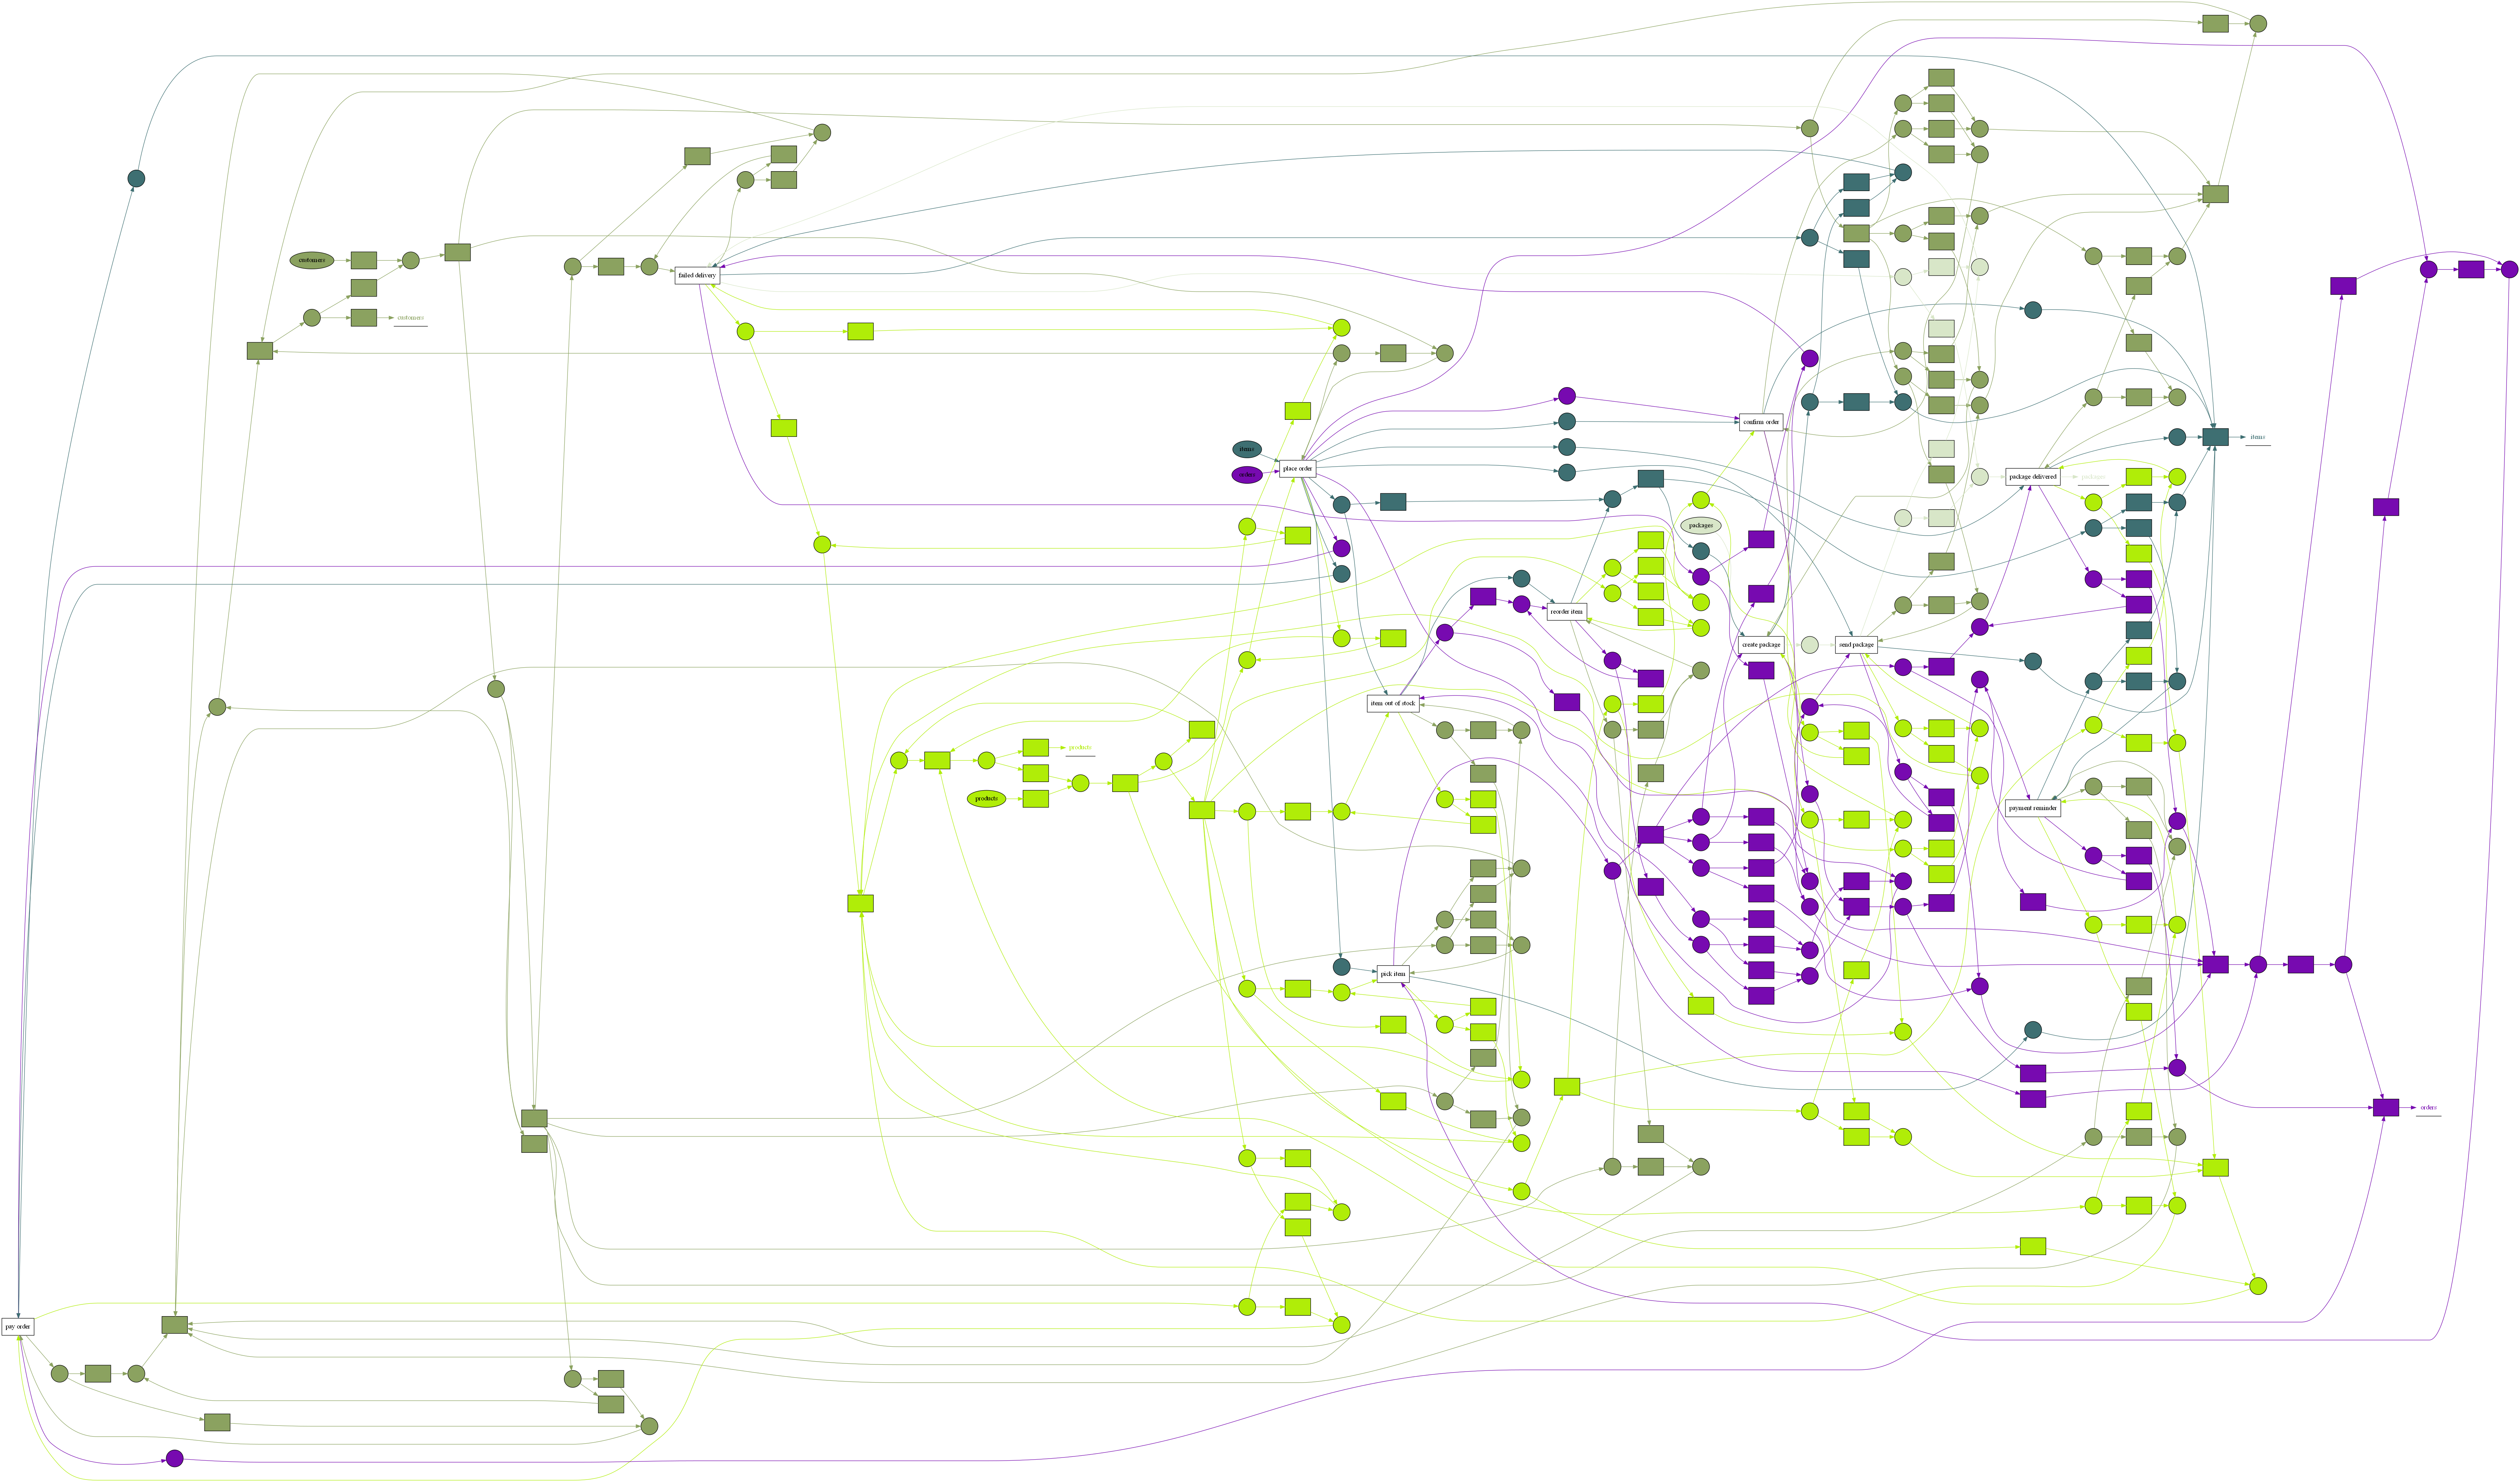

In [3]:
pm4py.view_ocpn(model)

In [4]:
from pm4py import OCEL
from typing import Dict, Collection
import sys

def cluster_equivalent_ocel(ocel: OCEL, object_type: str, max_objs: int = sys.maxsize) -> Dict[str, Collection[OCEL]]:
    """
    Perform a clustering of the object-centric event log, based on the 'executions' of
    a single object type. Equivalent 'executions' are grouped in the output dictionary.

    :param ocel: object-centric event log
    :param object_type: reference object type
    :param max_objs: maximum number of objects (of the given object type)
    :rtype: ``Dict[str, Collection[OCEL]]``

    .. code-block:: python3

        import pm4py

        ocel = pm4py.read_ocel('trial.ocel')
        clusters = pm4py.cluster_equivalent_ocel(ocel, "order")
    """
    from pm4py.algo.transformation.ocel.split_ocel import algorithm as split_ocel_algorithm
    from pm4py.objects.ocel.util import rename_objs_ot_tim_lex
    from pm4py.algo.transformation.ocel.description import algorithm as ocel_description
    lst_ocels = split_ocel_algorithm.apply(ocel, variant=split_ocel_algorithm.Variants.ANCESTORS_DESCENDANTS, parameters={"object_type": object_type, "max_objs": max_objs})
    ret = {}
    for index, oc in enumerate(lst_ocels):
        oc_ren = rename_objs_ot_tim_lex.apply(oc)
        descr = ocel_description.apply(oc_ren, parameters={"include_timestamps": False})
        if descr not in ret:
            ret[descr] = []
        ret[descr].append(oc)
    return ret

clusters = cluster_equivalent_ocel(ocel, "packages")
pm4py.ocel.discover_ocdfg

: 

: 

In [ ]:
from pm4py.vis import view_object_graph
from pm4py.algo.transformation.ocel.graphs import object_interaction_graph
graph = object_interaction_graph.apply(ocel)

view_object_graph(ocel, graph)

out of memory


CalledProcessError: Command '[WindowsPath('dot'), '-Kdot', '-Tpng', '-O', 'tmp0bzzkvg9.gv']' returned non-zero exit status 1. [stderr: b'out of memory\r\n']